In [1]:
from keras.models import load_model

In [18]:
import matplotlib.pyplot as plt
import datetime

In [3]:
model = load_model("network.h5")

In [24]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np


In [5]:
import io
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [6]:
output_class = ["with mask", "without mask"]
def mask_prediction(new_image):
  t_img = image.load_img(new_image, target_size = (256,256))
  plt.axis("off")
  plt.imshow(t_img)
  plt.show()

  t_img = image.img_to_array(t_img)/255
  t_img = np.expand_dims(t_img, axis=0)

  predicted_array = model.predict(t_img)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("The person in pictures is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

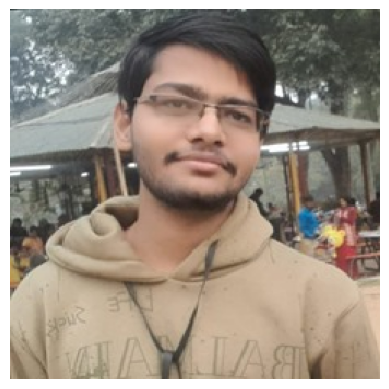

1/1 [==============================] - 0s 346ms/step
The person in pictures is  without mask  with  100.0  % accuracy


In [7]:
mask_prediction("./test directory/without_mask_1.jpg")

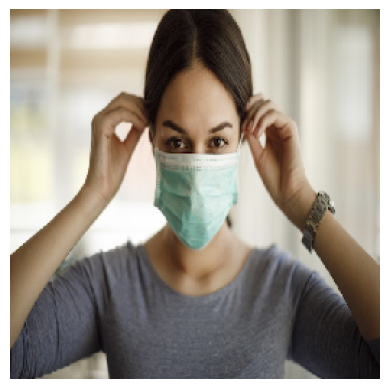

1/1 [==============================] - 0s 205ms/step
The person in pictures is  with mask  with  100.0  % accuracy


In [8]:
mask_prediction("./test directory/mask_myths_600.jpg")

In [9]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def face_mask_detector(frame):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (256, 256))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)

  return frame

In [10]:
input_image = cv2.imread("./test directory/mask_myths_600.jpg")

1/1 [==============================] - 0s 300ms/step


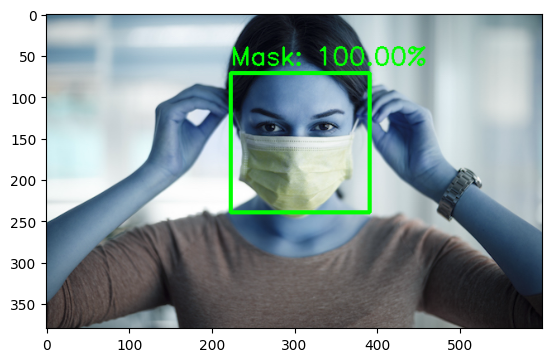

In [11]:
output = face_mask_detector(input_image)
plt.imshow(output)

In [12]:
input_image = cv2.imread("./test directory/without_mask_1.jpg")

1/1 [==============================] - 0s 168ms/step


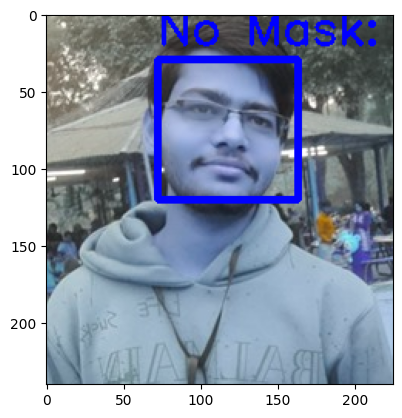

In [13]:
output = face_mask_detector(input_image)
plt.imshow(output)

In [23]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img = cap.read()
    face = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg', face_img)

        test_image = image.load_img('temp.jpg', target_size=(256,256,3))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        pred = model.predict(test_image)[0][0]
        
        if pred == 0:
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 3)
            cv2.putText(img, 'NO MASK', ((x+w)//2,y+h+20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 3)
        else:
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
            cv2.putText(img,'MASK', ((x+w)//2,y+h+20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0), 3)
        
        datet = str(datetime.datetime.now())
        cv2.putText(img, datet, (400,450), cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255), 1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 181ms/step
